# Dependencies

In [36]:
#dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [37]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect,func

In [38]:
import psycopg2

In [39]:
import warnings
from sqlalchemy import exc

# for warnings not included in regex-based filter below, just log
warnings.filterwarnings(
  "always", category=exc.RemovedIn20Warning
)

# Import CSV

In [40]:
#Clean up the look of the df step one( show all columns)
#===============================================================
pd.options.display.max_columns = None

In [41]:
police_killings_df = pd.read_csv("police_killings(Dwayne)/police_killings.csv")
display(police_killings_df)

,name,age,gender,raceethnicity,month,day,year,street address,city,state,latitude,longitude,state_fp,county_fp,tract_ce,geo_id,county_id,namelsad,lawenforcementagency,cause,armed,pop,share_white,share_black,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,32.529577,-86.362829,1,51,30902,1051030902,1051,Census Tract 309.02,Millbrook Police Department,Gunshot,No,3779,60.5,30.5,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,31.321739,-92.434860,22,79,11700,22079011700,22079,Census Tract 117,Rapides Parish Sheriff's Office,Gunshot,No,2769,53.8,36.2,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,42.583560,-87.835710,55,59,1200,55059001200,55059,Census Tract 12,Kenosha Police Department,Gunshot,No,4079,73.8,7.7,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,33.939298,-118.219463,6,37,535607,6037535607,6037,Census Tract 5356.07,South Gate Police Department,Gunshot,Firearm,4343,1.2,0.6,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,41.148575,-81.429878,39,153,530800,39153530800,39153,Census Tract 5308,Kent Police Department,Gunshot,No,6809,92.5,1.4,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,William Chapman II,18,Male,Black,April,22,2015,1098 Frederick Blvd,Portsmouth,VA,36.829014,-76.341438,51,740,211500,51740211500,51740,Census Tract 2115,Portsmouth Police Department,Gunshot,No,1640,40.9,53.8,0,25262,27418.0,46166,0.593900,1.0,1.0,35.2,0.152047,0.120553
463,William Dick III,28,Male,Native American,April,4,2015,Bureau of Indian Affairs Rd 66,Tonasket,WA,48.708542,-119.436829,53,47,970400,53047970400,53047,Census Tract 9704,US Forest Service,Taser,Firearm,4154,74.5,0.4,20.2,18470,35608.0,40368,0.882085,1.0,2.0,27.3,0.133650,0.174525
464,William Poole,52,Male,White,March,16,2015,130 Wedowee Ln,Gaston,NC,35.205776,-81.240669,37,71,31704,37071031704,37071,Census Tract 317.04,Gaston County Police Department,Gunshot,Firearm,3850,83.2,10.1,0.3,21175,38200.0,42017,0.909156,2.0,2.0,28.5,0.256150,0.072764
465,Yuvette Henderson,38,Female,Black,February,3,2015,3800 Hollis St,Oakland,CA,37.827129,-122.284492,6,1,401700,6001401700,6001,Census Tract 4017,Emeryville Police Department,Gunshot,Firearm,2544,21.7,24.9,37.1,26971,63052.0,72112,0.874362,2.0,4.0,23.9,0.069601,0.396476


In [42]:
#Changing the name of the dataframe
df = pd.DataFrame(police_killings_df)
df.head()

,name,age,gender,raceethnicity,month,day,year,street address,city,state,latitude,longitude,state_fp,county_fp,tract_ce,geo_id,county_id,namelsad,lawenforcementagency,cause,armed,pop,share_white,share_black,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,32.529577,-86.362829,1,51,30902,1051030902,1051,Census Tract 309.02,Millbrook Police Department,Gunshot,No,3779,60.5,30.5,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,31.321739,-92.434860,22,79,11700,22079011700,22079,Census Tract 117,Rapides Parish Sheriff's Office,Gunshot,No,2769,53.8,36.2,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,42.583560,-87.835710,55,59,1200,55059001200,55059,Census Tract 12,Kenosha Police Department,Gunshot,No,4079,73.8,7.7,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,33.939298,-118.219463,6,37,535607,6037535607,6037,Census Tract 5356.07,South Gate Police Department,Gunshot,Firearm,4343,1.2,0.6,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,41.148575,-81.429878,39,153,530800,39153530800,39153,Census Tract 5308,Kent Police Department,Gunshot,No,6809,92.5,1.4,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [43]:
#Using shape to count how many columns and rows are in the dateframe
#====================================================================
df.shape

(467, 34)

In [44]:
#Remove the columns that we found unneccessary for our analysis
#===============================================================================================================
df.drop(df.columns[[2,10,11,12,13,14,15,16,17,18,21,22,23,24,25,26,27,28,29,30,31,32,33]], axis=1, inplace=True)

In [45]:
#Check out results
#============================================
display(df)

,name,age,raceethnicity,month,day,year,street address,city,state,cause,armed
0,A'donte Washington,16,Black,February,23,2015,Clearview Ln,Millbrook,AL,Gunshot,No
1,Aaron Rutledge,27,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Gunshot,No
2,Aaron Siler,26,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Gunshot,No
3,Aaron Valdez,25,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,Gunshot,Firearm
4,Adam Jovicic,29,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Gunshot,No
...,...,...,...,...,...,...,...,...,...,...,...
462,William Chapman II,18,Black,April,22,2015,1098 Frederick Blvd,Portsmouth,VA,Gunshot,No
463,William Dick III,28,Native American,April,4,2015,Bureau of Indian Affairs Rd 66,Tonasket,WA,Taser,Firearm
464,William Poole,52,White,March,16,2015,130 Wedowee Ln,Gaston,NC,Gunshot,Firearm
465,Yuvette Henderson,38,Black,February,3,2015,3800 Hollis St,Oakland,CA,Gunshot,Firearm


In [46]:
#Rename columns
#=============================================================================
df.rename(columns = {
                    'name': 'Name',
                    'age': 'Age',
                    'raceethnicity': 'Ethnicity',
                    'month': 'Month',
                    'day': 'Day',
                    'year': 'Year', 
                    'street address':'Street Address',
                    'city': 'City',
                    'state': 'State',
                    'cause': "Cause of Death",
                    'armed': 'Armed'
}, inplace=True)

In [47]:
#Check results
display(df)

,Name,Age,Ethnicity,Month,Day,Year,Street Address,City,State,Cause of Death,Armed
0,A'donte Washington,16,Black,February,23,2015,Clearview Ln,Millbrook,AL,Gunshot,No
1,Aaron Rutledge,27,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Gunshot,No
2,Aaron Siler,26,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Gunshot,No
3,Aaron Valdez,25,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,Gunshot,Firearm
4,Adam Jovicic,29,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Gunshot,No
...,...,...,...,...,...,...,...,...,...,...,...
462,William Chapman II,18,Black,April,22,2015,1098 Frederick Blvd,Portsmouth,VA,Gunshot,No
463,William Dick III,28,Native American,April,4,2015,Bureau of Indian Affairs Rd 66,Tonasket,WA,Taser,Firearm
464,William Poole,52,White,March,16,2015,130 Wedowee Ln,Gaston,NC,Gunshot,Firearm
465,Yuvette Henderson,38,Black,February,3,2015,3800 Hollis St,Oakland,CA,Gunshot,Firearm


In [48]:
#df.set_index('State', inplace=True)
#display(df)

In [49]:
rds_connection_string = "postgres:postgres@localhost:5432/police_db"
engine = create_engine(f'postgresql://{rds_connection_string}')


In [50]:
inspector =inspect(engine)

In [51]:
inspector.get_table_names()


['police_killings', 'scrubbed_police_killings']

In [52]:
#Using the inspector to print the column names within the 'Police_killings' table and its types
columns = inspector.get_columns('police_killings')
for column in columns:
    print(column["name"], column["type"])

name VARCHAR
age VARCHAR
ethnicity VARCHAR
month VARCHAR
day INTEGER
year INTEGER
street_address VARCHAR
city VARCHAR
state VARCHAR
cause_of_death VARCHAR
armed VARCHAR


In [ ]:
#Load DataFrames into database 
df.to_sql(name='scrubbed_police_killings', con=engine, if_exists='append', index=True)


In [ ]:
#Confirmation on Scrubbed
pd.read_sql_query('select * from scrubbed_police_killings', con=engine).head()

In [24]:
#Breakdown of victims based on whether they were armed and what type of arms
type_of_arms = df['Armed'].value_counts()
type_of_arms

Firearm               230
No                    102
Knife                  68
Other                  26
Vehicle                18
Non-lethal firearm     14
Unknown                 7
Disputed                2
Name: Armed, dtype: int64

In [31]:
df['Armed'].describe()

count         467
unique          8
top       Firearm
freq          230
Name: Armed, dtype: object

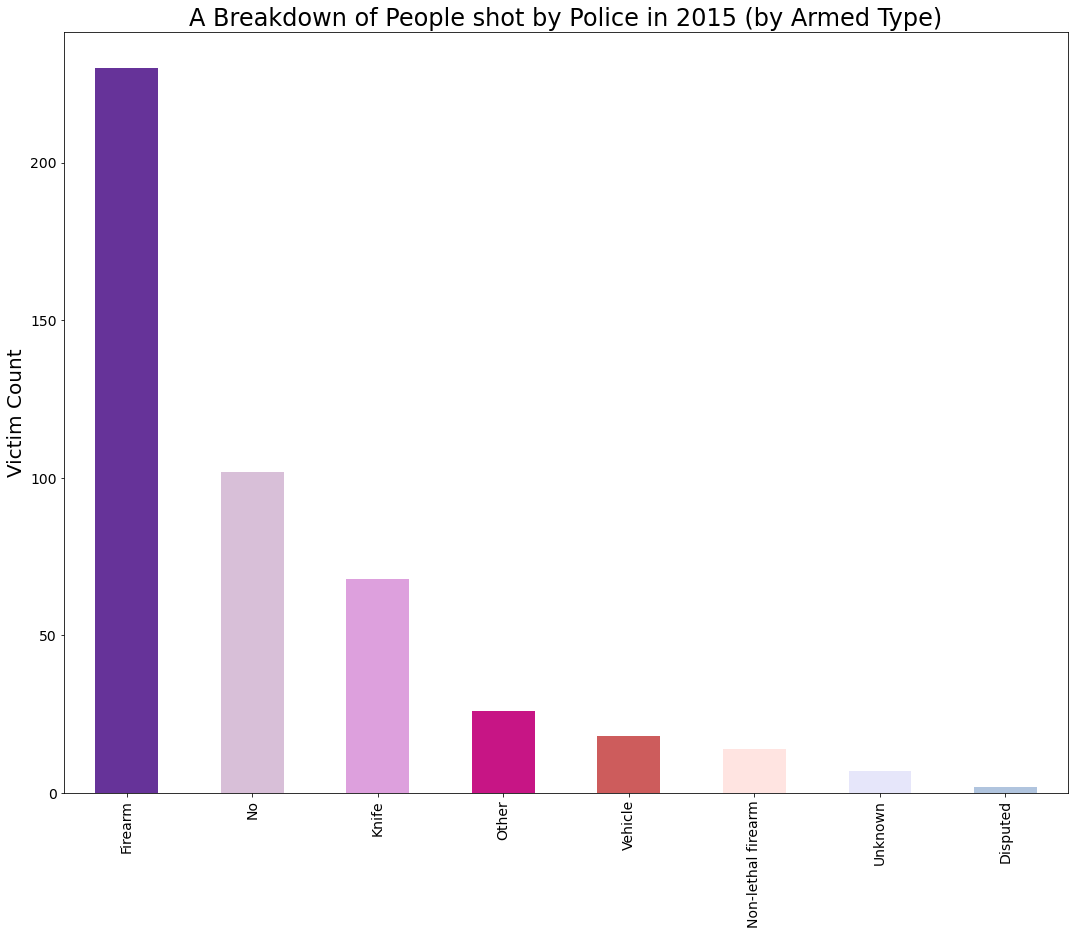

In [35]:
arm_plot = type_of_arms.plot.bar(figsize= (18,14), \
                                 color = ['rebeccapurple', 'thistle', 'plum', 'mediumvioletred', 'indianred','mistyrose','lavender', 'lightsteelblue']\
                                ,fontsize=14)
plt.title("A Breakdown of People shot by Police in 2015 (by Armed Type)", fontsize=24)
plt.ylabel("Victim Count", fontsize=20)
plt.show()